### 1. Récupère les documents
### 2. On nettoie les phrases (strip + @)
``df['documents'] = df['documents'].apply(lambda x: re.sub('[!\"#$%&()*+,-./:;<=>?@\[\]^_`{|}~\\\]+', "", x)) ``
### 3. Charger le corpus des documents dans un spacy doc
``df['spacy_object'] = df['documents'].apply(lambda x: x.lower()).apply(lambda x: nlp(x))``
### 4. Charger les STOP_WORDS
``from spacy.lang.fr.stop_words import STOP_WORDS``
<!-- ### 5. Lemmatization en tenant compte des STOP_WORDS
``tokenized_doc = [token.lemma_ for token in spacy_doc if token.lemma_ not in STOP_WORDS]`` -->
### 5. Ajouter les mots les + communs à STOP_WORDS
``STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)``
### 6. Lemmatization en tenant compte des STOP_WORDS mis à jour
``tokenized_doc = [token.lemma_ for token in spacy_doc if token.lemma_ not in STOP_WORDS_updated]``
``corpus_lemma = " ".join(tokenized_doc)``
### 7. Calculer TF-IDF - TfidfVectorizer()
* ``vectorizer = TfidfVectorizer(ngram_range=(1,2))``
* ``X         = vectorizer.fit_transform(corpus_df['documents']) # corpus_df = corpus_lemma tranformé en DF``
* ``X          =         cv.fit_transform(df['clean_text'])``
### 8. 
* ``rfc = RandomForestClassifier()``
* ``rfc.fit(X, y)``


# Learn about Obi-Wan Kenobi

Are you a star wars fan? If not, this exercise will help you learn about one of the most important character of the saga: Obi-Wan Kenobi. We will scrap a wikipedia page and create a word cloud to understand what comes out of the article. 

* To focus on NLP, let's use the following code to retrieve a clean HTML page from a variable. We will see later in the program how it works: 

```
import requests
from bs4 import BeautifulSoup
r = requests.get( "https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi" )
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = [ ]
for p in soup.find_all("p"):
  corpus.append(p.text)
```

# 1. Récupérer les docs

In [2]:
import requests
from bs4 import BeautifulSoup

# Page Wikipedia de Obi-Wan
r = requests.get("https://fr.wikipedia.org/wiki/Obi-Wan_Kenobi")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
  corpus.append(p.text)


corpus[:30]

['Pour les articles homonymes, voir Obi-Wan Kenobi (homonymie).\n',
 'Personnage de fiction apparaissant dansStar Wars.',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 '\n',
 'modifier ',
 "Obi-Wan Kenobi, également dit Ben Kenobi, est un personnage de fiction dans l'univers de la série cinématographique Star Wars, créée par George Lucas. Il est un chevalier et maître Jedi, personnage emblématique de la saga. Il fut, jusqu'à la sortie de Rogue One en 2016, l'un des seuls personnages à faire son apparition dans chaque film, que ce soit en présence réelle, en forme de «\xa0fantôme\xa0», ou même simplement en caméo où l'on n'entend que sa voix.\n",
 "Il est tout d'abord le padawan de Qui-Gon Jinn avant de devenir lui-même l'instructeur d'Anakin Skywalker, puis de le laisser pour mort à l'issue d'un terrible combat après que ce dernier a choisi le côté obscur de la Force pour devenir Dark Vador, Seigneur Noir des Sith, bras armé de l'empereur galactique Palpatine ou Dark Sidious. Ces évènements sont

* We need to install `spacy` modules corresponding to the language specifics (in this case French). So install `en_core_news_sm`. 
  * Feel free to help you with documentation: [English](https://spacy.io/models/fr)


* fr_core_news_sm SM pour small
* md medium
* lg large  

In [3]:
# -q pour quiet
!python -m spacy download fr_core_news_sm -q

✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')


* Since text is in french, import now `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [4]:
import fr_core_news_sm
nlp = fr_core_news_sm.load()

* For the rest, we need to create a complete corpus of text in a variable. This is a best-practice in the use of spacy. So you will need to create a clean corpus of text. You can do this with the help of : 
  * join()
  * strip() 
  
* Make some basic cleanings :
  * remove special characters
  * make sure there are no uppercase

# 2. On nettoie les phrases (strip)

In [5]:
# Stripped corpus of text
stripped_corpus = [text.strip() for text in corpus]

# cleaned_doc devient une longue chaine
cleaned_doc = " ".join(stripped_corpus)


# Remove punctuation and lowercase
import re
cleaned_doc = re.sub(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", "", cleaned_doc).lower()

print(cleaned_doc[:200])

pour les articles homonymes voir obiwan kenobi homonymie personnage de fiction apparaissant dansstar wars       modifier obiwan kenobi également dit ben kenobi est un personnage de fiction dans l'univ


## 3. Charger le corpus dans un spacy doc

* Now load your clean corpus in a `doc` object.

In [6]:
spacy_doc = nlp(cleaned_doc)
print(type(spacy_doc))

<class 'spacy.tokens.doc.Doc'>


* With the `wordcloud` library, create a first word cloud 

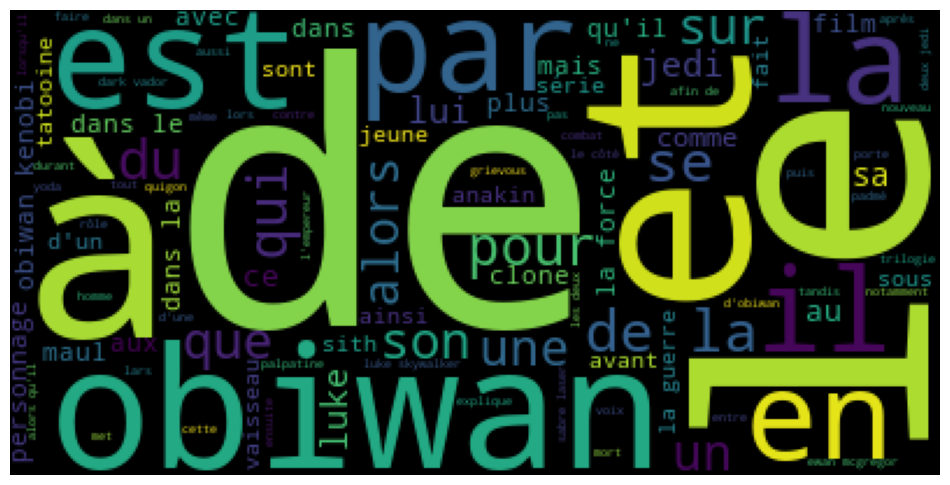

In [7]:
# Import wordcloud and matplotlib
from PIL import Image
import numpy as np
# import os
import matplotlib.pyplot as plt
import wordcloud

starwars_mask = np.array(Image.open("logo.webp"))

# Instanciate wordcloud
# wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask)
# wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue')
# wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask)
wd = wordcloud.WordCloud()

# Generate wordcloud 
cloud = wd.generate(spacy_doc.text)

# Show plot
plt.figure(figsize = (12, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

## 4. Charger les STOP_WORDS

* Now import the stop-words present in `spacy`

In [8]:
# Import Stop words 
from spacy.lang.fr.stop_words import STOP_WORDS

print(type(STOP_WORDS))

STOP_WORDS.add("marcel")
# print(STOP_WORDS)

for i, word in enumerate(STOP_WORDS):
    if (word[0]=="m"):
        print(word)
    


<class 'set'>
m’
malgre
même
moi-même
malgré
meme
mêmes
moins
maint
moi-meme
moindres
memes
ma
miens
me
mais
miennes
mes
mille
mienne
maintenant
moi
marcel
merci
mon
m'
mien


* Make a word cloud again without the stop words

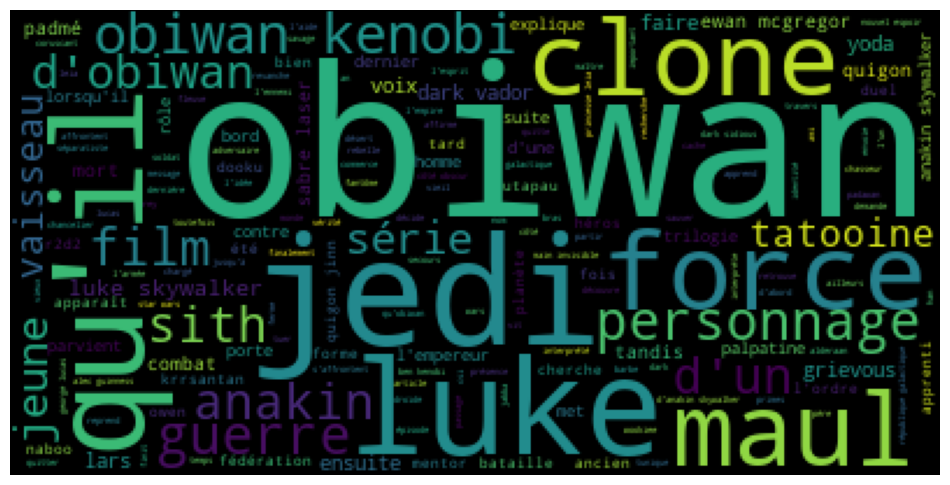

In [9]:
wd = wordcloud.WordCloud(stopwords = STOP_WORDS)
# wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', mask = starwars_mask, stopwords = STOP_WORDS)
# wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', stopwords = STOP_WORDS)

cloud = wd.generate(spacy_doc.text)
plt.figure(figsize = (12, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

## 5. Lemmatization en tenant compte des STOP WORDS

* We would need to have a corpus of lemmatized words, recreate a corpus of lemmatized words and visualize your new word cloud

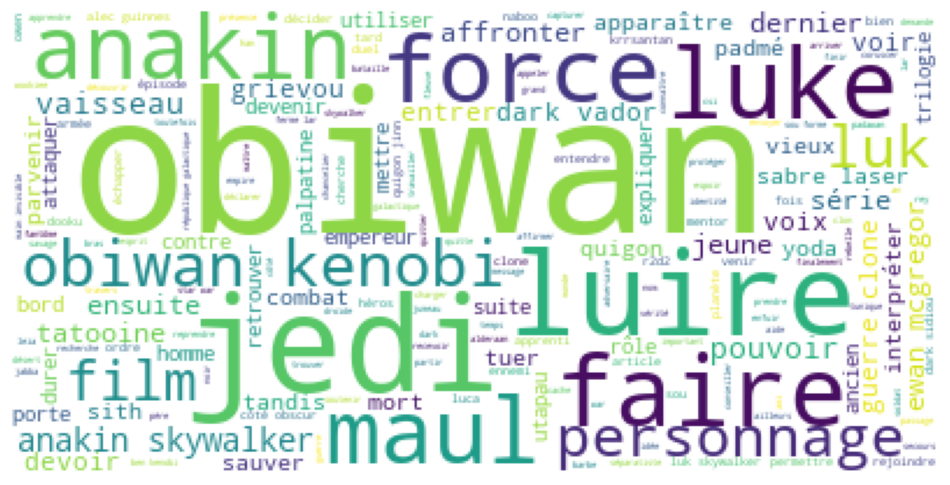

In [10]:
# Tokenize the cleaned document = lemmatization
# ! Bien voir le token.lemma_   -> C'est la que la lemmatisation à lieu
# En evitant les STOP_WORDS 
tokenized_doc = [token.lemma_ for token in spacy_doc if token.lemma_ not in STOP_WORDS]

# On a crée une liste tokenized_doc 
# Faut penser à joindre les mots dans une chaine
corpus_lemma = " ".join(tokenized_doc)

# word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', stopwords=STOP_WORDS) # mask = starwars_mask,
cloud = wd.generate(corpus_lemma)
plt.figure(figsize = (12, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

* Let's push analysis further! Some words are really common in our corpus, find which of them

In [11]:
# print(df_lemma.value_counts()>22)

NameError: name 'df_lemma' is not defined

In [12]:
# Import pandas to create a series
import pandas as pd 

# Create a DataFrame of lemmatized token
df_lemma = pd.Series(tokenized_doc)

# Create a mask of all counted values greater than 22

common = df_lemma.value_counts()>22

# Apply mask
common = common[common]

#Visualize first ten terms 
common[:10]

obiwan    True
          True
jedi      True
luire     True
anakin    True
Name: count, dtype: bool

* Update your list of stop words with the common words

# On enlève les mots les plus communs en les ajoutant à STOP_WORDS

In [14]:
# Update stop words 
new_stop_words = common.index
print(type(new_stop_words))
print(new_stop_words)

# Create a union of sets 
STOP_WORDS_updated = STOP_WORDS.union(new_stop_words)

<class 'pandas.core.indexes.base.Index'>
Index(['obiwan', ' ', 'jedi', 'luire', 'anakin'], dtype='object')


* Create a new word cloud 

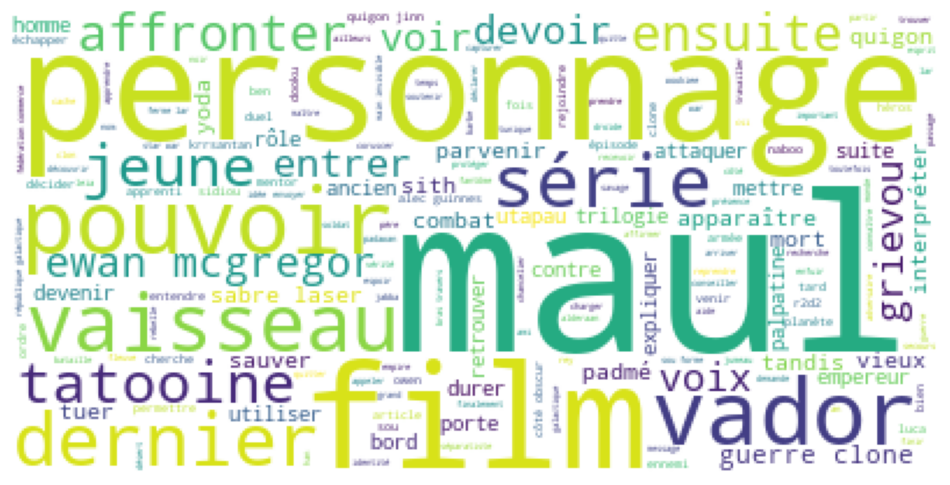

In [12]:
# Create a word cloud 
wd = wordcloud.WordCloud(background_color="white", contour_width=1, contour_color='steelblue', stopwords=STOP_WORDS_updated) # mask = starwars_mask,

# Generate wordcloud
cloud = wd.generate(corpus_lemma)

# Visualize wordcloud 
plt.figure(figsize = (12, 20))
plt.imshow(cloud)
plt.axis("off")
plt.show()

## 7. Lemmatization en tenant compte des STOP_WORDS mis à jour

* We will now start building a tf-idf matrix. Let's first create a DataFrame containing our lemmatized corpus without the updated stop words.

In [13]:
# Create lemmatization 
tokenized_doc = [token.lemma_ for token in spacy_doc if token.lemma_ not in STOP_WORDS_updated]

# Create a new corpus 
corpus_lemma = " ".join(tokenized_doc)

# Create a Series with 1 document
corpus_series = pd.Series(corpus_lemma)

# corpus_df est un dataframe avec une colonne "document"
corpus_df = pd.DataFrame(corpus_series, columns=["documents"])
corpus_df

,documents
0,article homonyme voir homonymie personnage fic...


## 8. Calculer TF-IDF - TfidfVectorizer()

* Let's create now a TF-IDF matrix using `sklearn`

In [14]:
# Tfidf transformer 
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF vector
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X = vectorizer.fit_transform(corpus_df['documents'])

# X is a generator. We can transform that as an array
dense = X.toarray()
dense

array([[0.01173793, 0.01173793, 0.01173793, ..., 0.01173793, 0.02347586,
        0.02347586]])

* Visualize most important words using `seaborn`, `matplotlib` or `plotly`

> Help: You can create a dataframe, transpose it and then easily create a visualization

In [15]:
# Creating a DataFrame with all the words and tf-idf score 
tfid_df = pd.DataFrame(dense, columns=[x for x in vectorizer.get_feature_names_out()])

tfid_df

,11,136,179,182,19,2000,20004142,2004,2014,2016,...,émission,épique,épisode,épreuve,équilibre,étoile,étouffe,évader,évènement,œuvre
0,0.011738,0.011738,0.011738,0.011738,0.011738,0.011738,0.011738,0.011738,0.011738,0.011738,...,0.023476,0.011738,0.05869,0.011738,0.011738,0.023476,0.011738,0.011738,0.023476,0.023476


In [16]:
# Transpose dataframe
tfid_df = tfid_df.T

# Create a new token column 
tfid_df["token"] = tfid_df.index

tfid_df

,0,token
11,0.011738,11
136,0.011738,136
179,0.011738,179
182,0.011738,182
19,0.011738,19
...,...,...
étoile,0.023476,étoile
étouffe,0.011738,étouffe
évader,0.011738,évader
évènement,0.023476,évènement


In [17]:
# Sort the top 15 values by descending order
tfid_df.sort_values(by=0, ascending=False)[:15]

,0,token
maul,0.176069,maul
clone,0.152593,clone
quigon,0.140855,quigon
personnage,0.140855,personnage
guerre,0.140855,guerre
film,0.129117,film
sith,0.117379,sith
vador,0.117379,vador
vaisseau,0.117379,vaisseau
pouvoir,0.117379,pouvoir


In [18]:
# Import plotly express
import plotly.express as px

# Create bar chart
my_width = 950
fig = px.bar(tfid_df.sort_values(by=0, ascending=False)[:15], x="token", y=0, width=my_width, height=my_width/1.618)


# Render chart
# fig.show(renderer="iframe")
fig.show()